In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('D:\\Machine_learning_data\\eighteen_nineteen_university_datasets.csv', encoding = 'unicode_escape')
df = pd.DataFrame(data)
df

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,> 1000,-,> 1000,> 1000,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,> 1000,> 1000,69.8
997,998,K?chi University,Japan,56,-,> 1000,-,> 1000,> 1000,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,> 1000,-,881,> 1000,> 1000,898,69.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    1000 non-null   object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


In [4]:
df.describe(include='all')

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
count,1000.000000,1000,1000,1000.00000,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,NaN,1000,61,NaN,404,492,221,905,892,830,75,NaN
top,NaN,Harvard University,USA,NaN,-,> 1000,-,> 1000,> 1000,> 1000,898,NaN
freq,NaN,1,213,NaN,597,509,731,77,51,171,129,NaN
mean,500.500000,NaN,NaN,40.02300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.034300
std,288.819436,NaN,NaN,49.22871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.670858
min,1.000000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.800000
25%,250.750000,NaN,NaN,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.500000
50%,500.500000,NaN,NaN,21.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.750000
75%,750.250000,NaN,NaN,51.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.300000


In [5]:
df.nunique()

World Rank              1000
Institution             1000
Location                  61
National Rank            213
Quality of Education     404
Alumni Employment        492
Quality of Faculty       221
Research Output          905
Quality Publications     892
Influence                830
Citations                 75
Score                    195
dtype: int64

In [6]:
df.isna().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculty      0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

In [7]:
#countinh ">1000" per column
(df == '> 1000').sum(axis=0)

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education      0
Alumni Employment       509
Quality of Faculty        0
Research Output          77
Quality Publications     51
Influence               171
Citations               110
Score                     0
dtype: int64

In [8]:
#Calculating the percentage of '> 1000' per column
percent_match = (df == '> 1000').sum() * 100 / len(df)
result_df = pd.DataFrame({'percent_match': percent_match})
result_df

,percent_match
World Rank,0.0
Institution,0.0
Location,0.0
National Rank,0.0
Quality of Education,0.0
Alumni Employment,50.9
Quality of Faculty,0.0
Research Output,7.7
Quality Publications,5.1
Influence,17.1


In [9]:
#counting "-" per column
(df == '-').sum(axis=0)

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education    597
Alumni Employment         0
Quality of Faculty      731
Research Output           0
Quality Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

In [10]:
#Calculating the percentage of '-' per column
dash_percentage = (df == '-').sum() * 100 / len(df)
result_df = pd.DataFrame({'percentage': dash_percentage})
result_df

,percentage
World Rank,0.0
Institution,0.0
Location,0.0
National Rank,0.0
Quality of Education,59.7
Alumni Employment,0.0
Quality of Faculty,73.1
Research Output,0.0
Quality Publications,0.0
Influence,0.0


In [11]:
#unique values of each column
for column in df.columns:
    print(f"unique values for '{column}':")
    print(df[column].unique())

unique values for 'World Rank':
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191

In [12]:
#Counting Unique Values
for column in df.columns:
    print(f"Value counts for {column}:")                   
    print(df[column].value_counts())
    print("-" * 50) 

Value counts for World Rank:
World Rank
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
--------------------------------------------------
Value counts for Institution:
Institution
Harvard University                                1
Fuzhou University                                 1
Rio de Janeiro State University                   1
Gwangju Institute of Science and Technology       1
University of Calabria                            1
                                                 ..
University of Turku                               1
Hong Kong University of Science and Technology    1
Temple University                                 1
Hong Kong Polytechnic University                  1
Capital Normal University                         1
Name: count, Length: 1000, dtype: int64
--------------------------------------------------
Value counts for Location:
Location
USA               

In [13]:
# converting object to float
def convert_object_to_float_except(df, exclude=['institution', 'location']):
    df_converted = df.copy()

    for col in df_converted.select_dtypes(include='object').columns:
        if col not in exclude:
            df_converted[col] = pd.to_numeric(df_converted[col], errors='coerce')
    
    return df_converted

df_converted = convert_object_to_float_except(df)

print(df_converted.head())
print(df_converted.dtypes)

   World Rank  Institution  Location  National Rank  Quality of Education  \
0           1          NaN       NaN              1                   2.0   
1           2          NaN       NaN              2                  10.0   
2           3          NaN       NaN              3                   3.0   
3           4          NaN       NaN              1                   5.0   
4           5          NaN       NaN              2                   9.0   

   Alumni Employment  Quality of Faculty  Research Output  \
0                1.0                 1.0              1.0   
1                3.0                 2.0             10.0   
2               11.0                 3.0             30.0   
3               19.0                 6.0             12.0   
4               25.0                10.0              9.0   

   Quality Publications  Influence  Citations  Score  
0                   1.0        1.0        1.0  100.0  
1                   4.0        3.0        2.0   96.7  
2    

In [14]:
# finding columns that contain the string '> 1000'
columns_with_gt_1000 = [col for col in df.columns if df[col].astype(str).str.contains('> ?1000').any()]

print("Columns containing '> 1000':")
print(columns_with_gt_1000)

Columns containing '> 1000':
['Alumni Employment', 'Research Output', 'Quality Publications', 'Influence', 'Citations']


In [15]:
#replacing '>1000' with 1001
df.replace(to_replace=['> 1000'], value=1001, inplace=True)
df['Alumni Employment'] = df['Alumni Employment'].replace('> 1000' , '1001')
df['Research Output'] = df['Research Output'].replace('> 1000' , '1001')
df['Quality Publications'] = df['Quality Publications'].replace('> 1000' , '1001')
df['Influence'] = df['Influence'].replace('> 1000' , '1001')
df['Citations'] = df['Citations'].replace('> 1000' , '1001')
df.describe()

,World Rank,National Rank,Score
count,1000.000000,1000.00000,1000.000000
mean,500.500000,40.02300,75.034300
std,288.819436,49.22871,4.670858
min,1.000000,1.00000,69.800000
25%,250.750000,6.00000,71.500000
50%,500.500000,21.00000,73.750000
75%,750.250000,51.00000,77.300000
max,1000.000000,213.00000,100.000000


In [16]:
# finding columns that contain the string '-'
columns_with_dash = [col for col in df.columns if df[col].astype(str).str.contains('-').any()]

print("Columns containing '-':")
print(columns_with_dash)

Columns containing '-':
['Institution', 'Quality\xa0of Education', 'Quality\xa0of Faculty']


In [17]:
#replacing '-' with max+1
df['Institution'] = df['Institution'].replace('-', 'Unknown')

df['Quality\xa0of Education'] = df['Quality\xa0of Education'].replace('-', np.nan)
df['Quality\xa0of Faculty'] = df['Quality\xa0of Faculty'].replace('-', np.nan)

df['Quality\xa0of Education'] = pd.to_numeric(df['Quality\xa0of Education'], errors='coerce')
df['Quality\xa0of Faculty'] = pd.to_numeric(df['Quality\xa0of Faculty'], errors='coerce')

mean_quality_education = df['Quality\xa0of Education'].mean()
mean_quality_faculty = df['Quality\xa0of Faculty'].mean()

df['Quality\xa0of Education'] = df['Quality\xa0of Education'].fillna(mean_quality_education)
df['Quality\xa0of Faculty'] = df['Quality\xa0of Faculty'].fillna(mean_quality_faculty)

print("DataFrame Info:")
df.tail(10)

DataFrame Info:


,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
990,991,University of Ibadan,Nigeria,1,540.000000,1001,265.000000,1001,1001,774,898,69.8
991,992,Shahid Beheshti University,Iran,12,323.406948,1001,144.817844,815,1001,1001,673,69.8
992,993,University of Massachusetts Lowell,USA,212,323.406948,930,144.817844,1001,989,1001,541,69.8
993,994,Loma Linda University,USA,213,180.000000,1001,144.817844,1001,949,890,898,69.8
994,995,University of Macau,Macau,1,323.406948,512,144.817844,883,816,1001,1001,69.8
995,996,Aga Khan University,Pakistan,3,323.406948,1001,144.817844,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,353.000000,716,296.000000,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,323.406948,1001,144.817844,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,323.406948,1001,144.817844,881,1001,1001,898,69.8
999,1000,Capital Normal University,China,108,323.406948,869,144.817844,923,904,889,1001,69.8


In [18]:
# Check if '-' exists anywhere in the DataFrame
has_dash = (df.astype(str) == '-').any().any()

if has_dash:
    print("Yes, there is at least one '-' in the DataFrame.")
else:
    print("No, there are no '-' values in the DataFrame.")

No, there are no '-' values in the DataFrame.


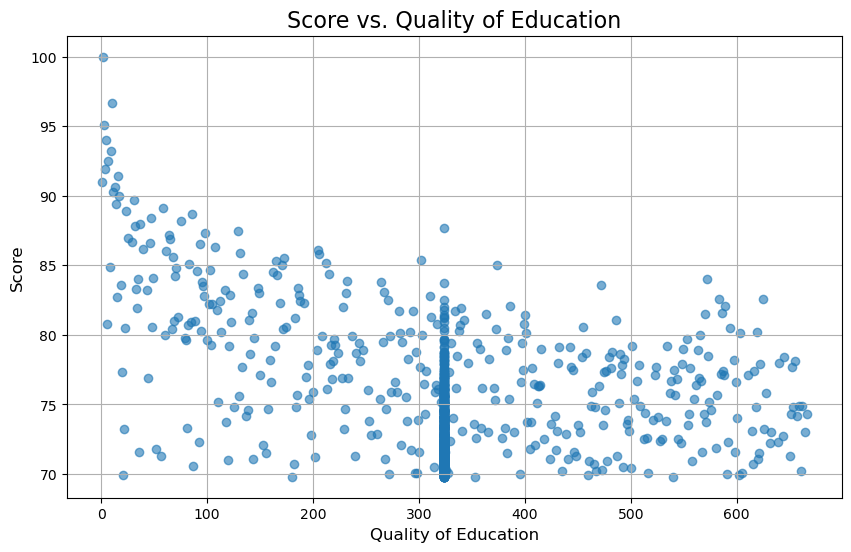

In [19]:
# Creating a scatter plot of Score vs. Quality of Education
plt.figure(figsize=(10, 6))
plt.scatter(df['Quality\xa0of Education'], df['Score'], alpha=0.6)
plt.title('Score vs. Quality of Education', fontsize=16)
plt.xlabel('Quality of Education', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True)
plt.show()

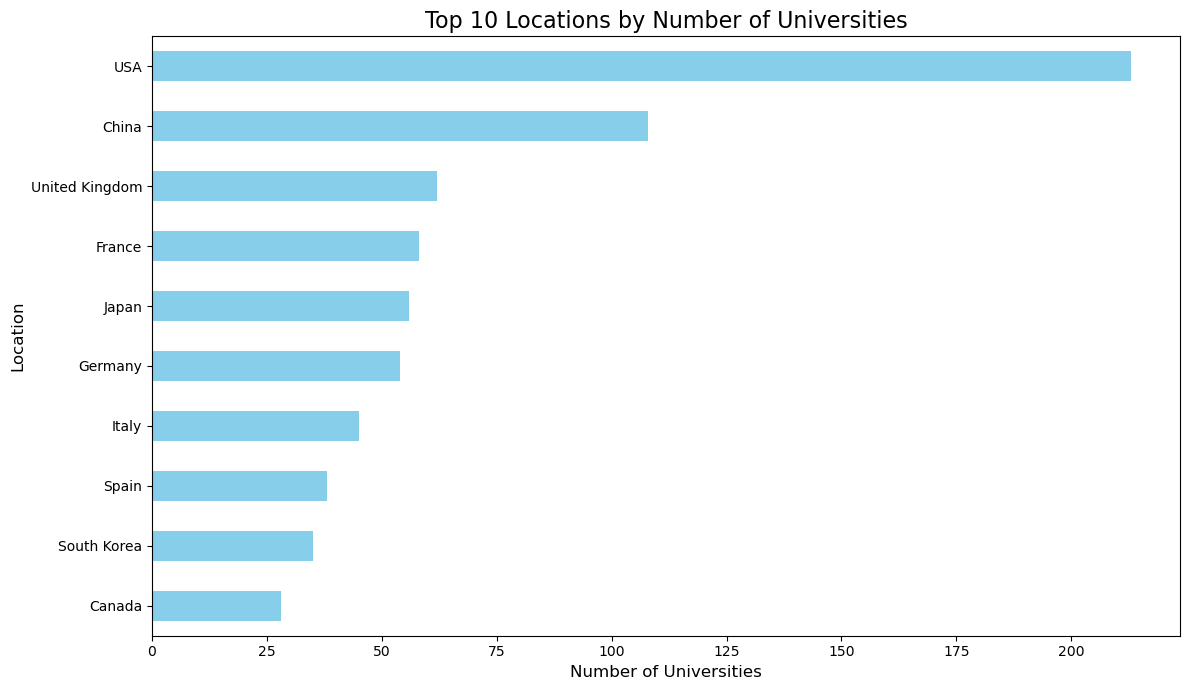

In [20]:
# Creating a bar chart of the top 10 locations by number of universities
top_10_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(12, 7))
top_10_locations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Locations by Number of Universities', fontsize=16)
plt.xlabel('Number of Universities', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()

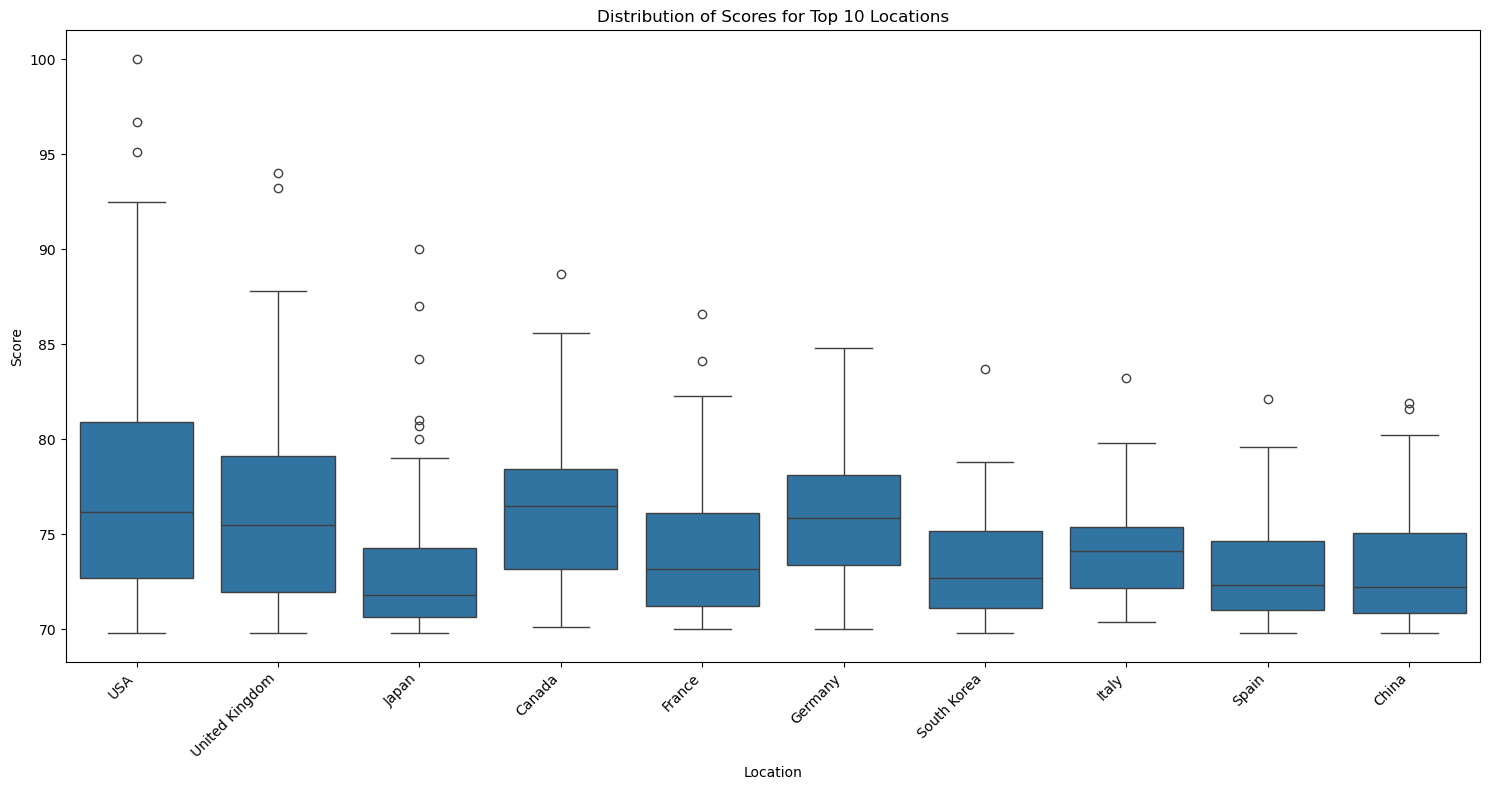

In [21]:
# Box plot of Score by Top 10 Locations
top_10_locations = df['Location'].value_counts().nlargest(10).index.tolist()

df_top_10 = df[df['Location'].isin(top_10_locations)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='Location', y='Score', data=df_top_10)
plt.title('Distribution of Scores for Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

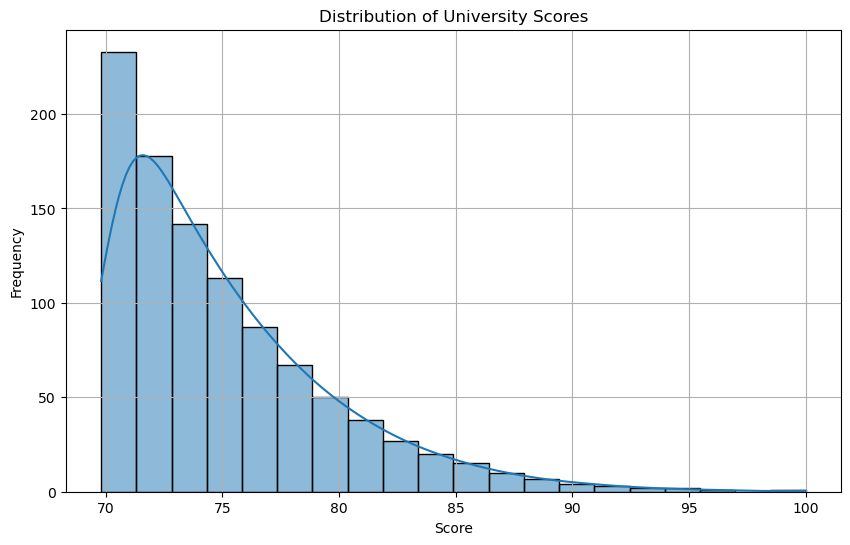

In [22]:
# Histogram of Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'].dropna(), bins=20, kde=True)
plt.title('Distribution of University Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

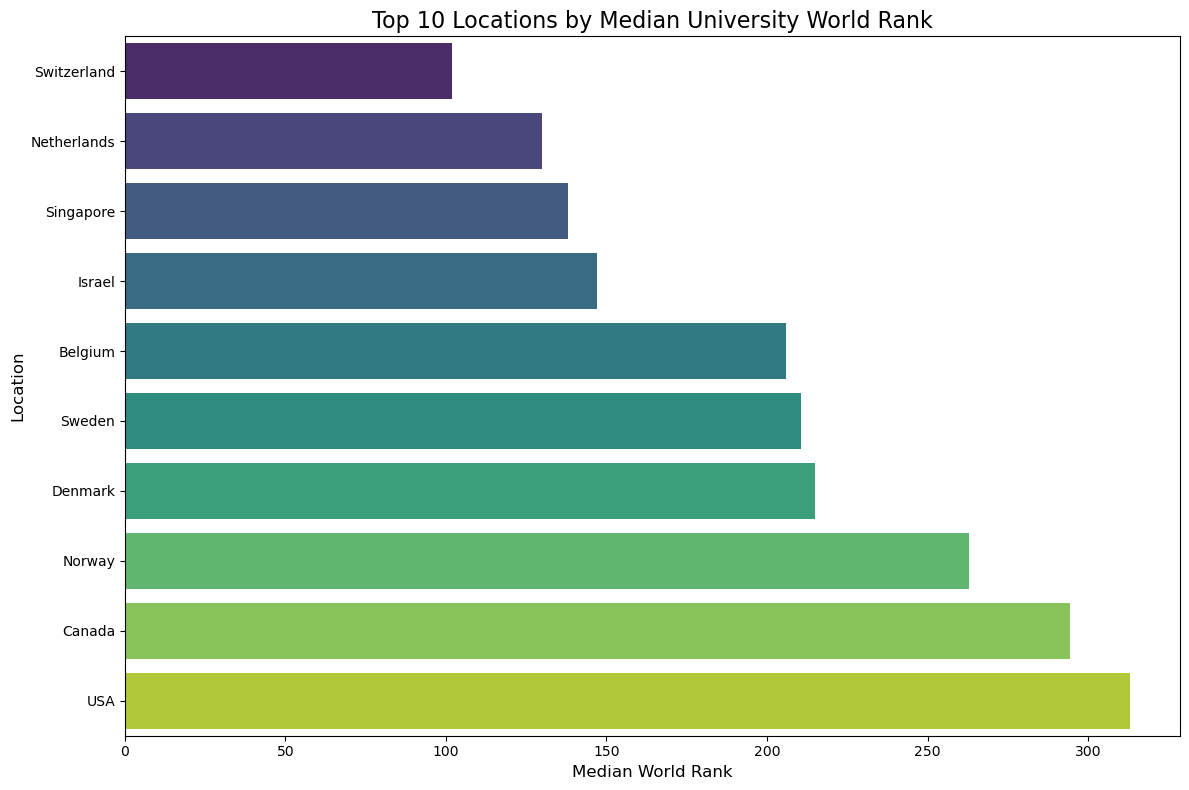

In [23]:
# Creating a horizontal bar chart to visualize the top 10 ranked locations
median_rank_by_location = df.groupby('Location')['World Rank'].median()

ranked_locations = median_rank_by_location.sort_values(ascending=True)

top_10_locations = ranked_locations.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, orient='h', palette='viridis', hue=top_10_locations.index, legend=False)
plt.title('Top 10 Locations by Median University World Rank', fontsize=16)
plt.xlabel('Median World Rank', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()

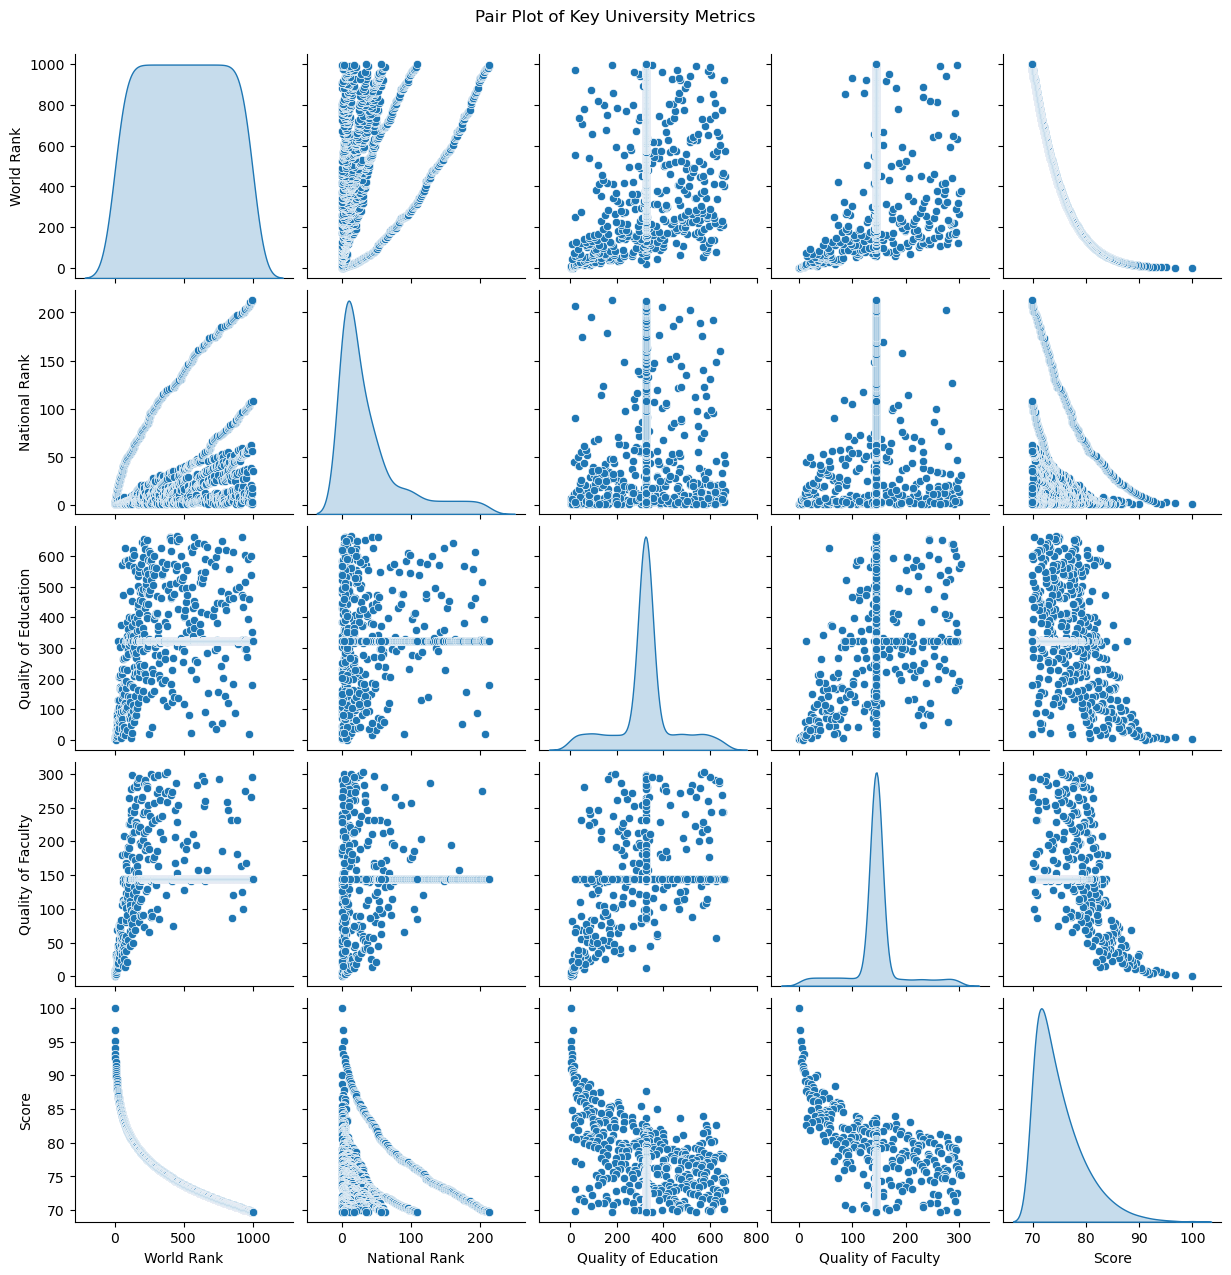

In [24]:
# Creating the pair plot
plot_cols = [
    'Score',
    'Research Output',
    'Quality Publications',
    'Citations'
]

sns.pairplot(df, kind='scatter', diag_kind='kde')
plt.suptitle('Pair Plot of Key University Metrics', y=1.02)
plt.show()

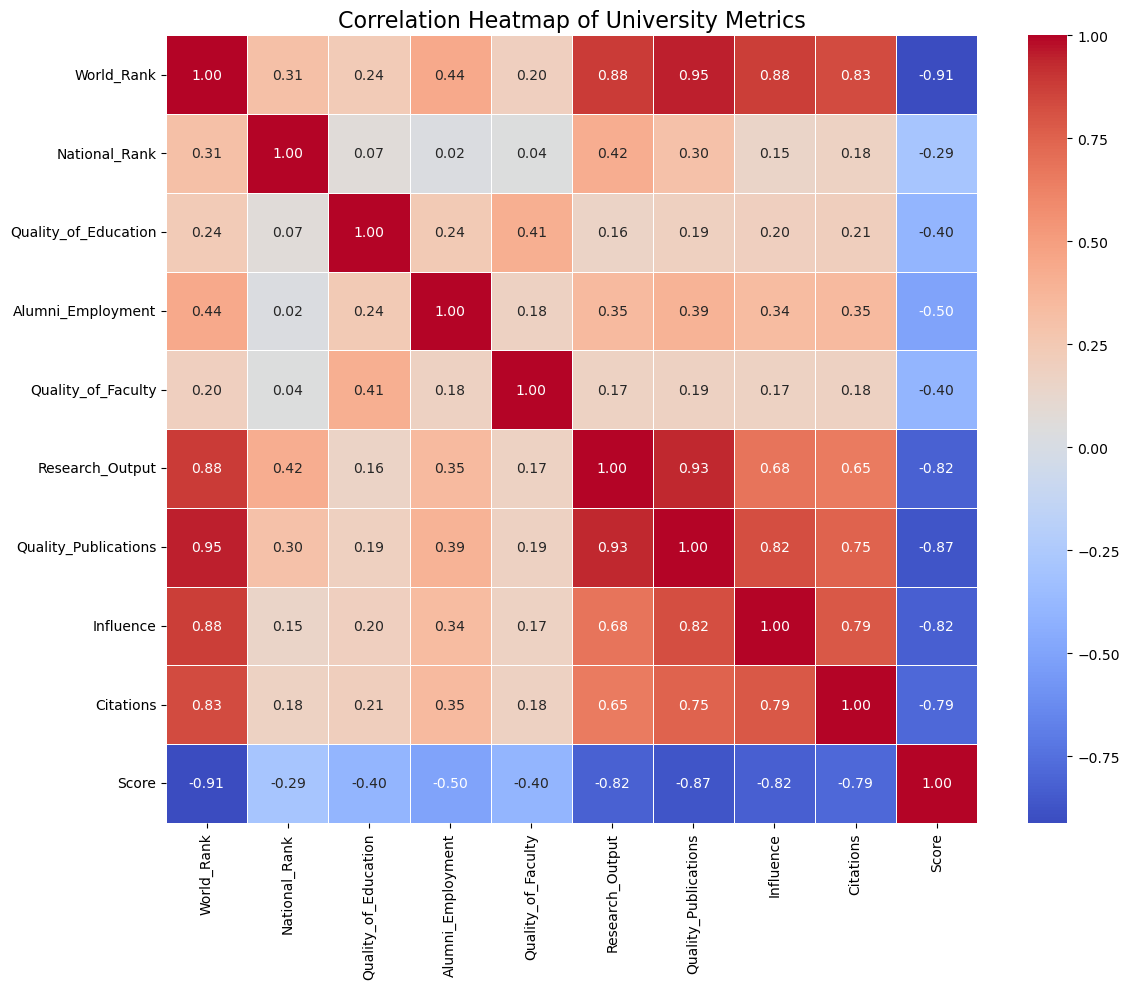

In [25]:
# Creating the heatmap
df.columns = df.columns.str.replace('\xa0', '_').str.replace(' ', '_')

numeric_cols = [
    'World_Rank',
    'National_Rank',
    'Quality_of_Education',
    'Alumni_Employment',
    'Quality_of_Faculty',
    'Research_Output',
    'Quality_Publications',
    'Influence',
    'Citations',
    'Score'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df[numeric_cols].dropna()

correlation_matrix = df_clean.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of University Metrics', fontsize=16)
plt.tight_layout()
plt.show()